Project overview:
    
    The goal of project was implementing CNN for cat vs dog recognition using CIFAR10 dataset.
    During work on preject I've decided to slightly change topic, to build cassifier to recognize all classes of    animals 
    that are available in this dataset.
    
    I've devided this notebook into few parts:
        
        - Loading data
        - Simple visual data exploration
        - Preparing data 
        - Building model architecture
        - Training and evaluating model
        - Improving performace of model
        
        

In [3]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

from skimage import color, exposure

%matplotlib inline
import matplotlib.pyplot as plt

## Loading data

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

 Getting rid of not animal images and labels

In [6]:
img_rows =32
img_cols = 32

In [7]:
X_train = X_train[np.isin(y_train, [2, 3, 4, 5, 6 ,7]).reshape(-1)]
y_train = y_train[np.isin(y_train, [2, 3, 4, 5, 6 ,7])]

In [8]:
X_test = X_test[np.isin(y_test, [2, 3, 4, 5, 6 ,7]).reshape(-1)]
y_test = y_test[np.isin(y_test, [2, 3, 4, 5, 6 ,7])]

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30000, 32, 32, 3), (6000, 32, 32, 3), (30000,), (6000,))

In [10]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)

Defining model variables

In [11]:
#defining input layer size
input_shape = (X_train.shape[1], X_train.shape[2], 3) 

#defining number of classes
num_classes = 6

## Plot example data

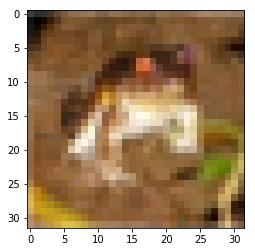

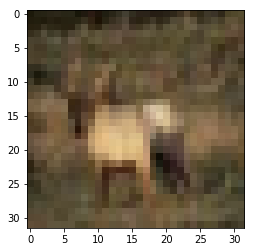

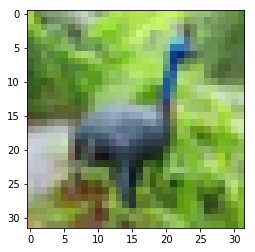

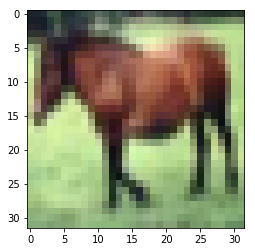

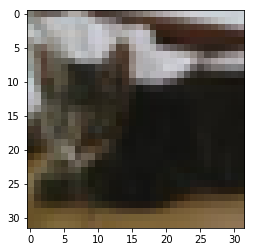

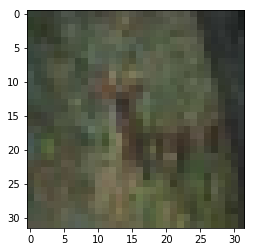

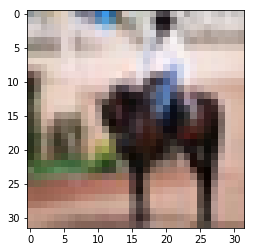

In [13]:
for i in range(7):
    plt.imshow(X_train[i])
    plt.show()

## Data normalization

In [13]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)


X_train = X_train/255
X_test = X_test/255
#because I've decided to 
y_train = y_train - 2
y_test = y_test -2


One hot encoding

In [14]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [15]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

## Building model architecture, training and evaluation

In [16]:
def create_model(filters=32, drop=0.3,dense=1024):
    return Sequential([
        Conv2D(filters, kernel_size=(3,3), activation='relu' ,input_shape=input_shape),
        Conv2D(filters, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Conv2D(2*filters, kernel_size=(3,3), activation='relu'),
        Conv2D(2*filters, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        
        Flatten(),
        
        Dense(dense, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax'),
        
    ])


In [79]:
model=create_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)        

Model compiling and training

In [117]:
model=create_model()

In [118]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [121]:
result = model.fit(X_train, 
          y_train,
          batch_size=256,
          epochs=10,
          validation_data=(X_test, y_test))

Train on 30000 samples, validate on 6000 samples
Epoch 1/10
30000/30000 [==============================] - 36s 1ms/sample - loss: 1.0190 - accuracy: 0.6097 - val_loss: 0.9792 - val_accuracy: 0.6322
Epoch 2/10
30000/30000 [==============================] - 41s 1ms/sample - loss: 0.9674 - accuracy: 0.6346 - val_loss: 0.9417 - val_accuracy: 0.6528
Epoch 3/10
30000/30000 [==============================] - 38s 1ms/sample - loss: 0.8984 - accuracy: 0.6623 - val_loss: 0.8758 - val_accuracy: 0.6742
Epoch 4/10
30000/30000 [==============================] - 37s 1ms/sample - loss: 0.8493 - accuracy: 0.6859 - val_loss: 0.8510 - val_accuracy: 0.6898
Epoch 5/10
30000/30000 [==============================] - 37s 1ms/sample - loss: 0.8179 - accuracy: 0.6951 - val_loss: 0.8059 - val_accuracy: 0.7053
Epoch 6/10
30000/30000 [==============================] - 37s 1ms/sample - loss: 0.7716 - accuracy: 0.7150 - val_loss: 0.7957 - val_accuracy: 0.7075
Epoch 7/10
30000/30000 [==============================] -

Learning curves

In [17]:
def plot_learning_curve(result, key='accuracy'):
    print_result(result)
    plt.plot(result.history[key])
    plt.plot(result.history['val_' + key])
    plt.title('Learing curve')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

Model loss on valid set :  0.7325947632789612
Model accuracy on valid set :  73.48333597183228%


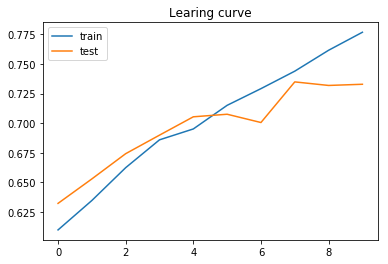

In [191]:
plot_learning_curve(result, key='accuracy')

In [141]:
def create_model1(filters=32, drop=0.3,dense=1024):
    return Sequential([
        Conv2D(filters, kernel_size=(3,3), activation='relu' ,input_shape=input_shape),
        Conv2D(filters, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Conv2D(2*filters, kernel_size=(3,3), activation='relu'),
        Conv2D(2*filters, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Conv2D(4*filters, kernel_size=(3,3), activation='relu',padding='same'),
        Conv2D(4*filters, kernel_size=(3,3), activation='relu',padding='same'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Flatten(),
        
        Dense(dense, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax'),
        
    ])


In [143]:
model1=create_model1(dense = 512)
model1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)        

In [144]:
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [146]:
result1 = model1.fit(X_train, 
          y_train,
          batch_size=128,
          epochs=100,
          validation_data=(X_test, y_test))

Train on 30000 samples, validate on 6000 samples
Epoch 1/100
30000/30000 [==============================] - 42s 1ms/sample - loss: 0.8909 - accuracy: 0.6672 - val_loss: 0.8804 - val_accuracy: 0.6750
Epoch 2/100
30000/30000 [==============================] - 43s 1ms/sample - loss: 0.8427 - accuracy: 0.6835 - val_loss: 0.8200 - val_accuracy: 0.7010
Epoch 3/100
30000/30000 [==============================] - 49s 2ms/sample - loss: 0.8038 - accuracy: 0.7042 - val_loss: 0.8534 - val_accuracy: 0.6888
Epoch 4/100
30000/30000 [==============================] - 44s 1ms/sample - loss: 0.7770 - accuracy: 0.7130 - val_loss: 0.7837 - val_accuracy: 0.7128
Epoch 5/100
30000/30000 [==============================] - 44s 1ms/sample - loss: 0.7368 - accuracy: 0.7257 - val_loss: 0.7643 - val_accuracy: 0.7222
Epoch 6/100
30000/30000 [==============================] - 44s 1ms/sample - loss: 0.7173 - accuracy: 0.7339 - val_loss: 0.7752 - val_accuracy: 0.7198
Epoch 7/100
30000/30000 [==========================

Model loss on valid set :  0.7179736466407776
Model accuracy on valid set :  79.61666584014893%


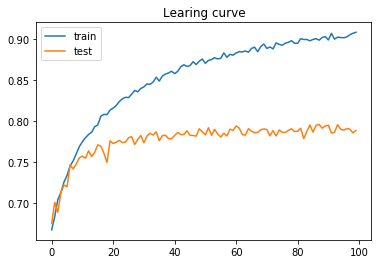

In [192]:
plot_learning_curve(result1)

In [167]:
def print_result(result):
    print('Model loss on valid set :  ' + str(result.history['val_loss'][-1]))
    print('Model accuracy on valid set :  ' + str(np.max(result.history['val_accuracy']) *100)+ "%")
    

In [168]:
print_result(result1)

Model loss on valid set :  0.7179736466407776
Model accuracy on valid set :  79.61666584014893%


This model as seen on plot tends to overfit. In next approach I will increase dropout rate and try to put padding to more layers. For the future models to speed up learining process i will decrese epoch number.

In [18]:
def create_model_2(filters=32, drop=0.3,dense=1024):
    return Sequential([
        Conv2D(filters, kernel_size=(3,3), activation='relu' ,input_shape=input_shape),
        Conv2D(filters, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Conv2D(2*filters, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(2*filters, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Conv2D(4*filters, kernel_size=(3,3), activation='relu',padding='same'),
        Conv2D(4*filters, kernel_size=(3,3), activation='relu',padding='same'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Flatten(),
        
        Dense(dense, activation='relu'),
        Dropout(drop),
        Dense(num_classes, activation='softmax'),
        
    ])

In [175]:
model_2 = create_model_2(drop=0.5, dense=1152)
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 64)        

In [176]:
model_2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [178]:
results_2 = model_2.fit(X_train, 
          y_train,
          batch_size=128,
          epochs=50,
          validation_data=(X_test, y_test)
            )

Train on 30000 samples, validate on 6000 samples
Epoch 1/50
30000/30000 [==============================] - 55s 2ms/sample - loss: 1.6555 - accuracy: 0.2998 - val_loss: 1.4932 - val_accuracy: 0.3943
Epoch 2/50
30000/30000 [==============================] - 59s 2ms/sample - loss: 1.4249 - accuracy: 0.4286 - val_loss: 1.3145 - val_accuracy: 0.4873
Epoch 3/50
30000/30000 [==============================] - 59s 2ms/sample - loss: 1.2763 - accuracy: 0.4980 - val_loss: 1.2284 - val_accuracy: 0.5325
Epoch 4/50
30000/30000 [==============================] - 63s 2ms/sample - loss: 1.1801 - accuracy: 0.5418 - val_loss: 1.1260 - val_accuracy: 0.5753
Epoch 5/50
30000/30000 [==============================] - 64s 2ms/sample - loss: 1.1182 - accuracy: 0.5690 - val_loss: 1.0397 - val_accuracy: 0.6088
Epoch 6/50
30000/30000 [==============================] - 73s 2ms/sample - loss: 1.0579 - accuracy: 0.5954 - val_loss: 1.1303 - val_accuracy: 0.5737
Epoch 7/50
30000/30000 [==============================] -

Model loss on valid set :  0.6448984041213989
Model accuracy on valid set :  77.70000100135803%


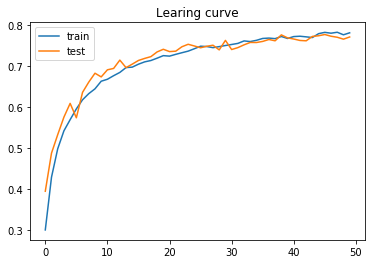

In [193]:
plot_learning_curve(results_2)

Model loss on valid set :  0.6448984041213989
Model accuracy on valid set :  77.70000100135803%


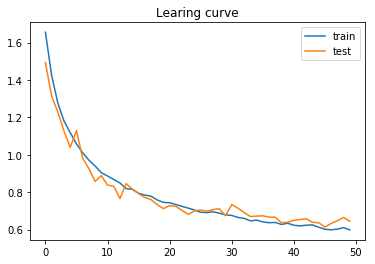

In [194]:
plot_learning_curve(results_2, key='loss')

Dropout helped with overfitting, but still there is high bias problem in my model

In [19]:
def create_model_3(filters=32, drop=0.3,dense=1024):
    return Sequential([
        Conv2D(filters, kernel_size=(3,3), activation='relu' ,input_shape=input_shape),
        Conv2D(filters, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Conv2D(2*filters, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(2*filters, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Conv2D(4*filters, kernel_size=(3,3), activation='relu',padding='same'),
        Conv2D(4*filters, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Flatten(),
        
        Dense(dense, activation='relu'),
        Dropout(drop),
        Dense(num_classes, activation='softmax'),
        
    ])

In [197]:
model_3 = create_model_3(drop = 0.5, dense=512)
model_3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 6, 6, 64)        

In [198]:
model_3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [199]:
results_23 = model_3.fit(X_train, 
          y_train,
          batch_size=256,
          epochs=50,
          validation_data=(X_test, y_test)
            )

Train on 30000 samples, validate on 6000 samples
Epoch 1/50
30000/30000 [==============================] - 40s 1ms/sample - loss: 1.7374 - accuracy: 0.2410 - val_loss: 1.7804 - val_accuracy: 0.2297
Epoch 2/50
30000/30000 [==============================] - 44s 1ms/sample - loss: 1.5525 - accuracy: 0.3591 - val_loss: 1.4401 - val_accuracy: 0.4178
Epoch 3/50
30000/30000 [==============================] - 45s 2ms/sample - loss: 1.4088 - accuracy: 0.4384 - val_loss: 1.4153 - val_accuracy: 0.4308
Epoch 4/50
30000/30000 [==============================] - 46s 2ms/sample - loss: 1.3178 - accuracy: 0.4823 - val_loss: 1.2808 - val_accuracy: 0.5005
Epoch 5/50
30000/30000 [==============================] - 47s 2ms/sample - loss: 1.2379 - accuracy: 0.5171 - val_loss: 1.1490 - val_accuracy: 0.5570
Epoch 6/50
30000/30000 [==============================] - 47s 2ms/sample - loss: 1.1690 - accuracy: 0.5479 - val_loss: 1.1162 - val_accuracy: 0.5678
Epoch 7/50
30000/30000 [==============================] -

Model loss on valid set :  0.6407860593795777
Model accuracy on valid set :  77.8166651725769%


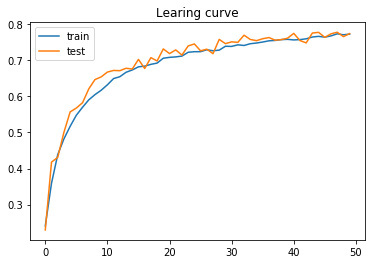

In [201]:
plot_learning_curve(results_23)

Trying to reduce bias

In [20]:
def preproc_img(img):
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
    img = color.hsv2rgb(hsv)

    return img

In [23]:
X_train_g = X_train.copy()
X_test_g = X_test.copy()

In [25]:
for i in range(X_train_g.shape[0]):
    X_train_g[i] = preproc_img(X_train_g[i])
    


In [26]:
for i in range(X_test_g.shape[0]):
    X_test_g[i] = preproc_img(X_test_g[i])
    

In [41]:
input_shape = (X_train_g.shape[1], X_train_g.shape[2], 3)

In [42]:
model_3_gr = create_model_3(drop = 0.5, dense=512)
model_3_gr.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)         

In [43]:
model_3_gr.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [44]:
results_3_gr = model_3_gr.fit(X_train_g, 
          y_train,
          batch_size=256,
          epochs=50,
          validation_data=(X_test_g, y_test)
            )

Train on 30000 samples, validate on 6000 samples
Epoch 1/50
30000/30000 [==============================] - 38s 1ms/sample - loss: 1.7832 - accuracy: 0.1874 - val_loss: 1.7388 - val_accuracy: 0.2523
Epoch 2/50
30000/30000 [==============================] - 42s 1ms/sample - loss: 1.6242 - accuracy: 0.3207 - val_loss: 1.4628 - val_accuracy: 0.3975
Epoch 3/50
30000/30000 [==============================] - 46s 2ms/sample - loss: 1.4725 - accuracy: 0.4036 - val_loss: 1.3427 - val_accuracy: 0.4557
Epoch 4/50
30000/30000 [==============================] - 46s 2ms/sample - loss: 1.3689 - accuracy: 0.4542 - val_loss: 1.2918 - val_accuracy: 0.4848
Epoch 5/50
30000/30000 [==============================] - 49s 2ms/sample - loss: 1.3179 - accuracy: 0.4756 - val_loss: 1.2165 - val_accuracy: 0.5162
Epoch 6/50
30000/30000 [==============================] - 48s 2ms/sample - loss: 1.2780 - accuracy: 0.4962 - val_loss: 1.2133 - val_accuracy: 0.5158
Epoch 7/50
30000/30000 [==============================] -

KeyboardInterrupt: 